In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
drive_path="/content/drive/Mydrive"

### Training a Resnet50 on both True and False

In [ ]:
import pandas as pd
import numpy as np

train_df=pd.read_csv("/content/drive/MyDrive/Quick draw/train.csv")

In [ ]:
train_df.head()

,drawing,key_id,word,recognized
0,"[[[108, 91, 51, 5, 19, 49, 32, 4, 0, 3, 51, 11...",6351448545689600,fish,False
1,"[[[98, 89, 82, 71, 48, 16, 9, 5, 5, 12, 48, 56...",5623056384917504,potato,False
2,"[[[185, 217, 255, 255, 243, 243, 240, 235, 222...",4538232068898816,fish,True
3,"[[[79, 61, 59, 59, 65, 65, 56, 55, 83, 105, 12...",6629670151782400,flamingo,False
4,"[[[87, 108, 133, 169, 232, 242, 244, 255, 246,...",5793545258532864,bulldozer,True


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432609 entries, 0 to 432608
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   drawing     432609 non-null  object
 1   key_id      432609 non-null  int64 
 2   word        432609 non-null  object
 3   recognized  432609 non-null  bool  
dtypes: bool(1), int64(1), object(2)
memory usage: 10.3+ MB


In [ ]:
classes=pd.unique(train_df["word"])


In [ ]:
len(pd.unique(train_df["word"]))

101

In [ ]:
pd.unique(train_df["recognized"])


array([False,  True])

In [ ]:
train_df['recognized'].value_counts()

True     222563
False    210046
Name: recognized, dtype: int64

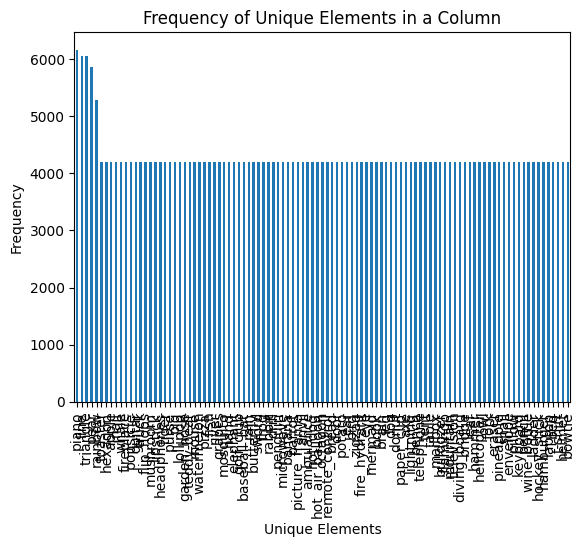

In [ ]:
import matplotlib.pyplot as plt

value_counts = train_df['word'].value_counts()

# Plot the frequency using a bar plot
value_counts.plot(kind='bar')

plt.xlabel('Unique Elements')
plt.ylabel('Frequency')
plt.title('Frequency of Unique Elements in a Column')

plt.show()

In [ ]:
value_counts[:10]


piano       6164
line        6051
triangle    6047
pear        5862
rainbow     5285
toaster     4200
hexagon     4200
apple       4200
nail        4200
whale       4200
Name: word, dtype: int64

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Count the number of samples for each word
word_counts = train_df['word'].value_counts()

# Calculate the desired number of samples per class - here minimum
desired_samples_per_class = min(word_counts)

# Perform random undersampling for each class to balance the dataset
rus = RandomUnderSampler(sampling_strategy={word: desired_samples_per_class for word in word_counts.index})
X_resampled, y_resampled = rus.fit_resample(train_df.drop(columns=['word']), train_df['word'])

# Create a new DataFrame with the undersampled data
train_df = pd.DataFrame(X_resampled, columns=train_df.columns.drop('word'))
train_df['word'] = y_resampled

# Check the class distribution after undersampling
class_counts_after = train_df['word'].value_counts()
print(class_counts_after)

ambulance        4200
octagon          4200
pillow           4200
pig              4200
picture_frame    4200
                 ... 
fork             4200
flip_flops       4200
flamingo         4200
fish             4200
zigzag           4200
Name: word, Length: 101, dtype: int64


In [ ]:
word_counts = train_df.groupby(['word', 'recognized']).size().unstack(fill_value=0)
print(word_counts)

recognized   False  True 
word                     
ambulance     2101   2099
anvil         2107   2093
apple         2114   2086
axe           2125   2075
banana        2071   2129
...            ...    ...
truck         2113   2087
watermelon    2111   2089
whale         2107   2093
wine_bottle   2091   2109
zigzag        2084   2116

[101 rows x 2 columns]


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424200 entries, 0 to 424199
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   drawing     424200 non-null  object
 1   key_id      424200 non-null  int64 
 2   recognized  424200 non-null  bool  
 3   word        424200 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 10.1+ MB


In [ ]:
train_df=train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df.head()

,drawing,key_id,recognized,word
0,"[[[92, 92], [72, 72]], [[94, 94], [60, 60]], [...",6369358693531648,False,fire_hydrant
1,"[[[164, 163, 151, 132, 120, 118, 118, 125, 142...",5279629306757120,True,telephone
2,"[[[58, 58], [108, 108]], [[14, 22, 25, 29, 87,...",5574187508826112,True,television
3,"[[[8, 23, 4, 0, 3, 18, 32, 39, 41, 43, 52, 63,...",6642129990320128,True,fork
4,"[[[121, 133, 183, 193, 202, 223, 239, 245, 245...",5296649607839744,False,eye


In [ ]:
word_counts.tail(51)
#line,pear,piano,rainbow,triangle
#remove the above falses

recognized,False,True
word,,
leaf,2094,2106
leg,2117,2083
lightning,2088,2112
line,1312,2888
lipstick,2101,2099
lollipop,2106,2094
mailbox,2097,2103
mermaid,2095,2105
microwave,2088,2112


In [ ]:
train_df = train_df[~((train_df['word'].isin(['line', 'pear', 'piano', 'rainbow', 'triangle'])) & (train_df['recognized'] == False))]
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df.drop("recognized",axis=1,inplace=True)

In [ ]:
train_df.head()

,drawing,key_id,word
0,"[[[92, 92], [72, 72]], [[94, 94], [60, 60]], [...",6369358693531648,fire_hydrant
1,"[[[164, 163, 151, 132, 120, 118, 118, 125, 142...",5279629306757120,telephone
2,"[[[58, 58], [108, 108]], [[14, 22, 25, 29, 87,...",5574187508826112,television
3,"[[[8, 23, 4, 0, 3, 18, 32, 39, 41, 43, 52, 63,...",6642129990320128,fork
4,"[[[121, 133, 183, 193, 202, 223, 239, 245, 245...",5296649607839744,eye


In [ ]:
classes = pd.unique(train_df["word"])

# Create a dictionary to map classes to numeric labels
class_to_label = {cls: label for label, cls in enumerate(classes)}


train_df["label"] = train_df["word"].map(class_to_label)


print(train_df.head())


                                             drawing            key_id  \
0  [[[92, 92], [72, 72]], [[94, 94], [60, 60]], [...  6369358693531648   
1  [[[164, 163, 151, 132, 120, 118, 118, 125, 142...  5279629306757120   
2  [[[58, 58], [108, 108]], [[14, 22, 25, 29, 87,...  5574187508826112   
3  [[[8, 23, 4, 0, 3, 18, 32, 39, 41, 43, 52, 63,...  6642129990320128   
4  [[[121, 133, 183, 193, 202, 223, 239, 245, 245...  5296649607839744   

           word  label  
0  fire_hydrant      0  
1     telephone      1  
2    television      2  
3          fork      3  
4           eye      4  


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import json

def vector_to_numpy(drawing, side=256):
    image = vector_to_image(drawing, side)
    image_array = np.array(image)
    return image_array

def vector_to_image(drawing, side=256):
    drawing = json.loads(drawing)
    min_x, min_y, max_x, max_y = calculate_bounding_box(drawing)

    # Calculate the offset to center the drawing within the canvas
    offset_x = (side - (max_x - min_x + 1)) // 2
    offset_y = (side - (max_y - min_y + 1)) // 2

    image = Image.new('L', (side, side), color='white')  # Create a white canvas
    draw = ImageDraw.Draw(image)

    for x, y in drawing:
        xy = [(x0 - min_x + offset_x, y0 - min_y + offset_y) for x0, y0 in zip(x, y)]
        draw.line(xy, fill='black', width=1)

    return image

def calculate_bounding_box(drawing):
    all_x = [x for x, _ in drawing]
    all_y = [y for _, y in drawing]

    min_x = min(min(x) for x in all_x)
    min_y = min(min(y) for y in all_y)
    max_x = max(max(x) for x in all_x)
    max_y = max(max(y) for y in all_y)

    return min_x, min_y, max_x, max_y


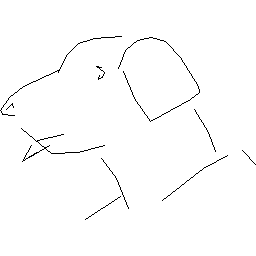

In [ ]:
test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")
vector_to_image(test_df.iloc[0][0], side=256)

In [ ]:
train_df= train_df.dropna(subset=['drawing', 'word'])

train_df.reset_index(drop=True, inplace=True)

In [ ]:
import torch
import torch.utils.data
from torch.utils.data import Dataset

class doodles(Dataset):
  def __init__(self,df,transforms=None):
    self.df=df
    self.transforms=transforms

  def __len__(self):
    return len(self.df)

  def __getitem__(self,idx):
    image=vector_to_image(self.df.iloc[idx][0], side=224)
    if self.transforms :
      image=self.transforms(image)

    label=self.df.iloc[idx][-1]

    # Create a one-hot encoded label tensor
    one_hot_label=torch.eye(101)[label]

    return image, one_hot_label


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(train_df, test_size=0.10, random_state=42)


train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.resnet50(pretrained=True)

# Modify the classifier layer for our classification task
num_classes = 101
model.fc = nn.Linear(model.fc.in_features, num_classes)


freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']


for name, param in model.named_parameters():
    if any(layer_name in name for layer_name in freeze_layers):
        param.requires_grad = False
    else:
        param.requires_grad = True



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 177MB/s]


In [ ]:
import torchvision.transforms as transforms
import torch
import torch.optim as optim

# Transform to convert single-channel image to RGB
class ConvertToRGB(object):
    def __init__(self):
        pass

    def __call__(self, img):
        # Convert a single-channel image to RGB
        img_rgb = transforms.Grayscale(num_output_channels=3)(img)
        return img_rgb




transformations = transforms.Compose([
    ConvertToRGB(),
    #transforms.ColorJitter(hue=0.05, saturation=0.05, brightness=0.05, contrast=0.05),
    #transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])


dataset = doodles(df=train_df, transforms=transformations)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

if(torch.cuda.is_available):
  device=torch.device("cuda")
else:
  device=torch.device("cpu")



model.load_state_dict(torch.load('/content/drive/MyDrive/Quick draw/resnet50_model_weights_epoch5.pth'))
model.to(device)

from tqdm import tqdm
val_dataset = doodles(df=val_df, transforms=transformations)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)


val_accuracies = []

num_epochs = 7

for epoch in range(5,num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)  # Use the CrossEntropyLoss without one-hot encoding

            val_loss += loss.item()

            _, predicted = outputs.max(1)  # Get the class index with the highest probability
            total += labels.size(0)

            # Convert one-hot encoded labels to class indices
            true_labels = torch.argmax(labels, dim=1)

            correct += predicted.eq(true_labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")

    # Save model weights after each epoch
    torch.save(model.state_dict(), f'model_weights_epoch{epoch+1}.pth')



Epoch 6/7:  20%|███████▏                            | 1181/5880 [08:11<32:34,  2.40it/s, loss=0.455]


KeyboardInterrupt: ignored

In [ ]:
test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")

class TestDoodles(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image = vector_to_image(self.df.iloc[idx]['drawing'], side=256)
        if self.transforms:
            image = self.transforms(image)

        return image


test_transformations = transforms.Compose([
    ConvertToRGB(),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])



test_dataset = TestDoodles(df=test_df, transforms=test_transformations)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


model.load_state_dict(torch.load('/content/drive/MyDrive/Quick draw/resnet50_model_weights_epoch5.pth'))
model.to(device)

top3_predictions = []


model.eval()

with torch.no_grad():
    for inputs in tqdm(test_loader, desc='Evaluating', ncols=100):
        inputs = inputs.to(device)
        outputs = model(inputs)

        # Get the top 3 class predictions for each input
        _, top3_classes = outputs.topk(3, dim=1)

        top3_predictions.extend(top3_classes.cpu().numpy())




label_to_class = {label: cls for cls, label in class_to_label.items()}



predicted_labels = [[label_to_class[class_idx] for class_idx in top3_classes] for top3_classes in top3_predictions]


predicted_strings = [' '.join(pred) for pred in predicted_labels]


predictions_df = pd.DataFrame({'key_id': test_df['key_id'], 'word': predicted_strings})


predictions_df.to_csv('predictions5.csv', index=False)



print(predictions_df.head())


Evaluating: 100%|███████████████████████████████████████████████| 2898/2898 [12:13<00:00,  3.95it/s]


             key_id                       word
0  4635484858875904             frog dog mouse
1  5954439485587456             tiger dog frog
2  4703897211895808            penguin ear owl
3  4614697670148096    purse laptop paper_clip
4  5669598810603520  mermaid helicopter grapes


### Similarly training on True

In [ ]:
train_df=pd.read_csv("/content/drive/MyDrive/Quick draw/train.csv")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


word_counts = train_df['word'].value_counts()

# Calculate the desired number of samples per class - Here, minimum
desired_samples_per_class = min(word_counts)

# Perform random undersampling for each class to balance the dataset
rus = RandomUnderSampler(sampling_strategy={word: desired_samples_per_class for word in word_counts.index})
X_resampled, y_resampled = rus.fit_resample(train_df.drop(columns=['word']), train_df['word'])

# Create a new DataFrame with the undersampled data
train_df = pd.DataFrame(X_resampled, columns=train_df.columns.drop('word'))
train_df['word'] = y_resampled


class_counts_after = train_df['word'].value_counts()
print(class_counts_after)

ambulance        4200
octagon          4200
pillow           4200
pig              4200
picture_frame    4200
                 ... 
fork             4200
flip_flops       4200
flamingo         4200
fish             4200
zigzag           4200
Name: word, Length: 101, dtype: int64


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424200 entries, 0 to 424199
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   drawing     424200 non-null  object
 1   key_id      424200 non-null  int64 
 2   recognized  424200 non-null  bool  
 3   word        424200 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 10.1+ MB


In [ ]:
# shuffle the data
train_df=train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df.head()

,drawing,key_id,recognized,word
0,"[[[103, 103, 107, 114, 124, 134, 141, 145, 146...",6426964606844928,False,fire_hydrant
1,"[[[50, 43, 42, 46, 77, 134, 129, 133, 120, 83,...",4556302002946048,False,telephone
2,"[[[13, 2, 1, 16, 104, 185, 190, 203, 227, 204,...",6070948698521600,True,television
3,"[[[21, 13, 11, 14, 28, 36, 42, 50, 58, 68, 74,...",6594779112538112,True,fork
4,"[[[93, 77, 66, 62, 64, 71, 83, 107, 132, 161, ...",6663350480011264,True,eye


In [ ]:
train_df=train_df[~(train_df['recognized']==False)]
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216590 entries, 0 to 216589
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   drawing     216590 non-null  object
 1   key_id      216590 non-null  int64 
 2   recognized  216590 non-null  bool  
 3   word        216590 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 5.2+ MB


In [ ]:
train_df.drop("recognized",axis=1,inplace=True)

In [ ]:

classes = pd.unique(train_df["word"])

# Create a dictionary to map classes to numeric labels
class_to_label = {cls: label for label, cls in enumerate(classes)}

# Map the "word" column to numeric labels
train_df["label"] = train_df["word"].map(class_to_label)


print(train_df.head())


                                             drawing            key_id  \
0  [[[13, 2, 1, 16, 104, 185, 190, 203, 227, 204,...  6070948698521600   
1  [[[21, 13, 11, 14, 28, 36, 42, 50, 58, 68, 74,...  6594779112538112   
2  [[[93, 77, 66, 62, 64, 71, 83, 107, 132, 161, ...  6663350480011264   
3  [[[122, 112, 110, 113, 122, 130, 140, 144, 136...  4830149256151040   
4  [[[0, 48, 117, 140, 174, 190, 196, 177, 137, 1...  6610288545628160   

         word  label  
0  television      0  
1        fork      1  
2         eye      2  
3   butterfly      3  
4     octagon      4  


In [ ]:
train_df= train_df.dropna(subset=['drawing', 'word'])

train_df.reset_index(drop=True, inplace=True)

In [ ]:
import torch
import torch.utils.data
from torch.utils.data import Dataset

class doodles(Dataset):
  def __init__(self,df,transforms=None):
    self.df=df
    self.transforms=transforms

  def __len__(self):
    return len(self.df)

  def __getitem__(self,idx):
    image=vector_to_image(self.df.iloc[idx][0], side=224)
    if self.transforms :
      image=self.transforms(image)

    label=self.df.iloc[idx][-1]

    one_hot_label=torch.eye(101)[label]

    return image, one_hot_label


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(train_df, test_size=0.10, random_state=42)


train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.resnet50(pretrained=True)

# Modify the classifier layer for our classification task
num_classes = 101
model.fc = nn.Linear(model.fc.in_features, num_classes)


freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']


for name, param in model.named_parameters():
    if any(layer_name in name for layer_name in freeze_layers):
        param.requires_grad = False
    else:
        param.requires_grad = True



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torchvision.transforms as transforms
import torch
import torch.optim as optim

# Transform to convert single-channel image to RGB
class ConvertToRGB(object):
    def __init__(self):
        pass

    def __call__(self, img):
        # Convert a single-channel image to RGB
        img_rgb = transforms.Grayscale(num_output_channels=3)(img)
        return img_rgb




transformations = transforms.Compose([
    ConvertToRGB(),
    #transforms.ColorJitter(hue=0.05, saturation=0.05, brightness=0.05, contrast=0.05),
    #transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])


dataset = doodles(df=train_df, transforms=transformations)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

if(torch.cuda.is_available):
  device=torch.device("cuda")
else:
  device=torch.device("cpu")



#model.load_state_dict(torch.load('/content/drive/MyDrive/Quick draw/resnet50_model_weights_epoch5.pth'))
model.to(device)

from tqdm import tqdm
val_dataset = doodles(df=val_df, transforms=transformations)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)



val_accuracies = []

num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / len(train_loader))


    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)

            # Convert one-hot encoded labels to class indices
            true_labels = torch.argmax(labels, dim=1)

            correct += predicted.eq(true_labels).sum().item()


    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")


    torch.save(model.state_dict(), f'model_weights_epoch{epoch+1}.pth')


Epoch 1/2: 100%|████████████████████████████████████| 3048/3048 [19:50<00:00,  2.56it/s, loss=0.918]


Epoch 1/2, Loss: 0.9177225515285502, Validation Loss: 0.612373981503962, Validation Accuracy: 81.84%


Epoch 2/2: 100%|████████████████████████████████████| 3048/3048 [19:47<00:00,  2.57it/s, loss=0.573]


Epoch 2/2, Loss: 0.5726834892630186, Validation Loss: 0.5386060677622624, Validation Accuracy: 83.74%


In [ ]:
model.load_state_dict(torch.load('/content/model_weights_epoch2.pth'))

num_epochs=5
for epoch in range(2,num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / len(train_loader))


    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)

            # Convert one-hot encoded labels to class indices
            true_labels = torch.argmax(labels, dim=1)

            correct += predicted.eq(true_labels).sum().item()


    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")


    torch.save(model.state_dict(), f'model_weights_epoch{epoch+1}.pth')


Epoch 3/5: 100%|████████████████████████████████████| 3048/3048 [19:45<00:00,  2.57it/s, loss=0.505]


Epoch 3/5, Loss: 0.5047584184130111, Validation Loss: 0.5170535635104222, Validation Accuracy: 84.53%


Epoch 4/5: 100%|████████████████████████████████████| 3048/3048 [19:44<00:00,  2.57it/s, loss=0.458]


Epoch 4/5, Loss: 0.457846137809902, Validation Loss: 0.5002345738597324, Validation Accuracy: 85.12%


Epoch 5/5: 100%|█████████████████████████████████████| 3048/3048 [19:43<00:00,  2.58it/s, loss=0.42]


Epoch 5/5, Loss: 0.4199810405518478, Validation Loss: 0.48632876324442637, Validation Accuracy: 85.45%


In [ ]:
test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")



class TestDoodles(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image = vector_to_image(self.df.iloc[idx]['drawing'], side=256)
        if self.transforms:
            image = self.transforms(image)

        return image


test_transformations = transforms.Compose([
    ConvertToRGB(),  # Convert to RGB if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])



test_dataset = TestDoodles(df=test_df, transforms=test_transformations)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

model.load_state_dict(torch.load('/content/model_weights_epoch5.pth'))
model.to(device)

top3_predictions = []


model.eval()

with torch.no_grad():
    for inputs in tqdm(test_loader, desc='Evaluating', ncols=100):
        inputs = inputs.to(device)
        outputs = model(inputs)

        # Get the top 3 class predictions for each input
        _, top3_classes = outputs.topk(3, dim=1)

        top3_predictions.extend(top3_classes.cpu().numpy())




label_to_class = {label: cls for cls, label in class_to_label.items()}

predicted_labels = [[label_to_class[class_idx] for class_idx in top3_classes] for top3_classes in top3_predictions]

predicted_strings = [' '.join(pred) for pred in predicted_labels]

predictions_df = pd.DataFrame({'key_id': test_df['key_id'], 'word': predicted_strings})

predictions_df.to_csv('predictions5.csv', index=False)
print(predictions_df.head())


Evaluating: 100%|███████████████████████████████████████████████| 2898/2898 [12:10<00:00,  3.97it/s]


             key_id                        word
0  4635484858875904            frog bird parrot
1  5954439485587456              dog frog tiger
2  4703897211895808             penguin ear owl
3  4614697670148096  purse telephone television
4  5669598810603520        mermaid grapes whale


### Similarly train on False

In [ ]:
import pandas as pd
import numpy as np

train_df=pd.read_csv("/content/drive/MyDrive/Quick draw/train.csv")

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

word_counts = train_df['word'].value_counts()

# Calculate the desired number of samples per class - Here, minimum
desired_samples_per_class = min(word_counts)

# Perform random undersampling for each class to balance the dataset
rus = RandomUnderSampler(sampling_strategy={word: desired_samples_per_class for word in word_counts.index})
X_resampled, y_resampled = rus.fit_resample(train_df.drop(columns=['word']), train_df['word'])

# Create a new DataFrame with the undersampled data
train_df = pd.DataFrame(X_resampled, columns=train_df.columns.drop('word'))
train_df['word'] = y_resampled

# Check the class distribution after undersampling
class_counts_after = train_df['word'].value_counts()
print(class_counts_after)

ambulance        4200
octagon          4200
pillow           4200
pig              4200
picture_frame    4200
                 ... 
fork             4200
flip_flops       4200
flamingo         4200
fish             4200
zigzag           4200
Name: word, Length: 101, dtype: int64


In [ ]:
train_df=train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_df.head()

,drawing,key_id,recognized,word
0,"[[[49, 46, 54, 48, 21, 10, 1, 0, 14, 35, 65, 7...",5596891997798400,True,fire_hydrant
1,"[[[136, 142, 142, 135, 100, 95, 95, 89, 90, 10...",5979674817593344,True,telephone
2,"[[[29, 29, 38, 37, 44, 53, 141, 210, 232, 245,...",5759981653590016,False,television
3,"[[[78, 60, 56, 1, 0], [252, 160, 121, 101, 15]...",4746200026710016,True,fork
4,"[[[7, 7, 0], [1, 72, 101]], [[15, 29, 34, 19, ...",4784897946288128,False,eye


In [ ]:
train_df=train_df[train_df['recognized']==False]
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df.drop("recognized",axis=1,inplace=True)

In [ ]:
train_df.head()

,drawing,key_id,word
0,"[[[29, 29, 38, 37, 44, 53, 141, 210, 232, 245,...",5759981653590016,television
1,"[[[7, 7, 0], [1, 72, 101]], [[15, 29, 34, 19, ...",4784897946288128,eye
2,"[[[235, 208, 181, 118, 100, 35, 13, 1, 0, 5, 1...",4984415518195712,butterfly
3,"[[[0, 153, 188, 200, 210, 217, 212, 206, 197, ...",6500639737643008,triangle
4,"[[[67, 74, 103, 183, 236, 255, 242, 239, 232, ...",4766189790167040,ambulance


In [ ]:

classes = pd.unique(train_df["word"])

# Create a dictionary to map classes to numeric labels
class_to_label = {cls: label for label, cls in enumerate(classes)}

# Map the "word" column to numeric labels
train_df["label"] = train_df["word"].map(class_to_label)


print(train_df.head())


                                             drawing            key_id  \
0  [[[29, 29, 38, 37, 44, 53, 141, 210, 232, 245,...  5759981653590016   
1  [[[7, 7, 0], [1, 72, 101]], [[15, 29, 34, 19, ...  4784897946288128   
2  [[[235, 208, 181, 118, 100, 35, 13, 1, 0, 5, 1...  4984415518195712   
3  [[[0, 153, 188, 200, 210, 217, 212, 206, 197, ...  6500639737643008   
4  [[[67, 74, 103, 183, 236, 255, 242, 239, 232, ...  4766189790167040   

         word  label  
0  television      0  
1         eye      1  
2   butterfly      2  
3    triangle      3  
4   ambulance      4  


In [ ]:
train_df= train_df.dropna(subset=['drawing', 'word'])

train_df.reset_index(drop=True, inplace=True)

In [ ]:
import torch
import torch.utils.data
from torch.utils.data import Dataset

class doodles(Dataset):
  def __init__(self,df,transforms=None):
    self.df=df
    self.transforms=transforms

  def __len__(self):
    return len(self.df)

  def __getitem__(self,idx):
    image=vector_to_image(self.df.iloc[idx][0], side=224)
    if self.transforms :
      image=self.transforms(image)

    label=self.df.iloc[idx][-1]

    one_hot_label=torch.eye(101)[label]

    return image, one_hot_label


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


train_df, val_df = train_test_split(train_df, test_size=0.10, random_state=42)

train_df.reset_index(drop=True, inplace=True)
val_df.reset_index(drop=True, inplace=True)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

model = models.resnet50(pretrained=True)

# Modify the classifier layer for our classification task
num_classes = 101
model.fc = nn.Linear(model.fc.in_features, num_classes)


freeze_layers = ['conv1', 'bn1', 'layer1', 'layer2']


for name, param in model.named_parameters():
    if any(layer_name in name for layer_name in freeze_layers):
        param.requires_grad = False
    else:
        param.requires_grad = True



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
import torchvision.transforms as transforms
import torch
import torch.optim as optim

# Transform to convert single-channel image to RGB
class ConvertToRGB(object):
    def __init__(self):
        pass

    def __call__(self, img):
        # Convert a single-channel image to RGB
        img_rgb = transforms.Grayscale(num_output_channels=3)(img)
        return img_rgb




transformations = transforms.Compose([
    ConvertToRGB(),
    #transforms.ColorJitter(hue=0.05, saturation=0.05, brightness=0.05, contrast=0.05),
    #transforms.RandomVerticalFlip(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])


dataset = doodles(df=train_df, transforms=transformations)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=True, num_workers=2)

criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.0001)

if(torch.cuda.is_available):
  device=torch.device("cuda")
else:
  device=torch.device("cpu")



#model.load_state_dict(torch.load('/content/model_weights_epoch2.pth'))
model.to(device)

from tqdm import tqdm
val_dataset = doodles(df=val_df, transforms=transformations)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)



val_accuracies = []

num_epochs = 2

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / len(train_loader))


    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)

            # Convert one-hot encoded labels to class indices
            true_labels = torch.argmax(labels, dim=1)

            correct += predicted.eq(true_labels).sum().item()


    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")


    torch.save(model.state_dict(), f'model_weights_epoch{epoch+1}.pth')


Epoch 1/2: 100%|█████████████████████████████████████| 2919/2919 [19:29<00:00,  2.50it/s, loss=2.96]


Epoch 1/2, Loss: 2.956050166531596, Validation Loss: 2.597754833881672, Validation Accuracy: 39.99%


Epoch 2/2: 100%|█████████████████████████████████████| 2919/2919 [19:25<00:00,  2.50it/s, loss=2.49]


Epoch 2/2, Loss: 2.4911388958427505, Validation Loss: 2.463357581725487, Validation Accuracy: 43.28%


In [ ]:
model.load_state_dict(torch.load('/content/model_weights_epoch2.pth'))
model.to(device)

from tqdm import tqdm
val_dataset = doodles(df=val_df, transforms=transformations)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=True, num_workers=2)



val_accuracies = []

num_epochs = 5

for epoch in range(2,num_epochs):
    model.train()
    running_loss = 0.0

    with tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs}', ncols=100) as pbar:
        for inputs, labels in pbar:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            pbar.set_postfix(loss=running_loss / len(train_loader))

    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)

            # Convert one-hot encoded labels to class indices
            true_labels = torch.argmax(labels, dim=1)

            correct += predicted.eq(true_labels).sum().item()


    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader)}, Validation Loss: {val_loss / len(val_loader)}, Validation Accuracy: {val_accuracy:.2f}%")


    torch.save(model.state_dict(), f'model_weights_epoch{epoch+1}.pth')

Epoch 3/5: 100%|█████████████████████████████████████| 2919/2919 [19:28<00:00,  2.50it/s, loss=2.33]


Epoch 3/5, Loss: 2.3288048541313087, Validation Loss: 2.4053657502394454, Validation Accuracy: 44.84%


Epoch 4/5: 100%|█████████████████████████████████████| 2919/2919 [19:26<00:00,  2.50it/s, loss=2.21]


Epoch 4/5, Loss: 2.206985904566839, Validation Loss: 2.3480532983633187, Validation Accuracy: 46.24%


Epoch 5/5: 100%|█████████████████████████████████████| 2919/2919 [19:27<00:00,  2.50it/s, loss=2.11]


Epoch 5/5, Loss: 2.107552722775393, Validation Loss: 2.3369270691504846, Validation Accuracy: 47.13%


In [ ]:
test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")


class TestDoodles(Dataset):
    def __init__(self, df, transforms=None):
        self.df = df
        self.transforms = transforms

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):

        image = vector_to_image(self.df.iloc[idx]['drawing'], side=256)
        if self.transforms:
            image = self.transforms(image)

        return image

test_transformations = transforms.Compose([
    ConvertToRGB(),  # Convert to RGB if needed
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5),
])



test_dataset = TestDoodles(df=test_df, transforms=test_transformations)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

model.load_state_dict(torch.load('/content/model_weights_epoch5.pth'))
model.to(device)

top3_predictions = []


model.eval()

with torch.no_grad():
    for inputs in tqdm(test_loader, desc='Evaluating', ncols=100):
        inputs = inputs.to(device)
        outputs = model(inputs)

        # Get the top 3 class predictions for each input
        _, top3_classes = outputs.topk(3, dim=1)

        # Append the predictions to the list
        top3_predictions.extend(top3_classes.cpu().numpy())




label_to_class = {label: cls for cls, label in class_to_label.items()}

predicted_labels = [[label_to_class[class_idx] for class_idx in top3_classes] for top3_classes in top3_predictions]

predicted_strings = [' '.join(pred) for pred in predicted_labels]

predictions_df = pd.DataFrame({'key_id': test_df['key_id'], 'word': predicted_strings})

predictions_df.to_csv('predictions5.csv', index=False)
print(predictions_df.head())


Evaluating: 100%|███████████████████████████████████████████████| 2898/2898 [12:13<00:00,  3.95it/s]


             key_id                    word
0  4635484858875904            dog ear frog
1  5954439485587456          tiger dog frog
2  4703897211895808         ear penguin eye
3  4614697670148096  purse helmet telephone
4  5669598810603520   mermaid parrot bowtie


### Combining the predictions

In [ ]:
import pandas as pd

test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")

# Load predictions from the three models
predictions_true = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions_true5.csv")
predictions_false = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions_false5.csv")
predictions_both = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions4.csv")

# Doing weighted Mode of the predictions

predictions=[]
for idx in range(len(predictions_both)):
  #for t,f,b in zip(predictions_true[idx]['word'],predictions_false[idx]['word'],predictions_both[idx]['word']):
  t=predictions_true.iloc[idx]['word'].split()
  f=predictions_false.iloc[idx]['word'].split()
  b=predictions_both.iloc[idx]['word'].split()
  classes={}
  for i in range(3):
    if t[i] in classes:
      classes[t[i]]+=abs(i-3)
    else:
      classes[t[i]]=abs(i-3)
    if f[i] in classes:
      classes[f[i]]+=abs(i-3)
    else:
      classes[f[i]]=abs(i-3)
    if b[i] in classes:
      classes[b[i]]+=abs(i-3)
    else:
      classes[b[i]]=abs(i-3)
  sorted_classes=sorted(classes.items(), key=lambda x: x[1], reverse=True)
  top_3 = sorted_classes[:3]
  predicted_labels=[]
  for item, count in top_3:
    predicted_labels.append(item)
  predictions.append(predicted_labels)

predicted_strings = [' '.join(pred) for pred in predictions]


predictions_df = pd.DataFrame({'key_id': test_df['key_id'], 'word': predicted_strings})

predictions_df.to_csv('predictions_finaly24.csv', index=False)

print(predictions_df.head())



             key_id                     word
0  4635484858875904           dog frog mouse
1  5954439485587456           dog frog tiger
2  4703897211895808       penguin parrot owl
3  4614697670148096  purse toaster telephone
4  5669598810603520    mermaid grapes parrot


In [ ]:
import pandas as pd

test_df=pd.read_csv("/content/drive/MyDrive/Quick draw/test.csv")

# Load predictions from the three models
predictions_true = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions_true5.csv")
predictions_false = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions_false5.csv")
predictions_both = pd.read_csv("/content/drive/MyDrive/Quick draw/predictions5.csv")

# Doing weighted Mode of the predictions

predictions=[]
for idx in range(len(predictions_both)):
  #for t,f,b in zip(predictions_true[idx]['word'],predictions_false[idx]['word'],predictions_both[idx]['word']):
  t=predictions_true.iloc[idx]['word'].split()
  f=predictions_false.iloc[idx]['word'].split()
  b=predictions_both.iloc[idx]['word'].split()
  classes={}
  for i in range(3):
    if t[i] in classes:
      classes[t[i]]+=1
    else:
      classes[t[i]]=1
    if f[i] in classes:
      classes[f[i]]+=1
    else:
      classes[f[i]]=1
    if b[i] in classes:
      classes[b[i]]+=1
    else:
      classes[b[i]]=1
  sorted_classes=sorted(classes.items(), key=lambda x: x[1], reverse=True)
  top_3 = sorted_classes[:3]
  predicted_labels=[]
  for item, count in top_3:
    predicted_labels.append(item)
  predictions.append(predicted_labels)

predicted_strings = [' '.join(pred) for pred in predictions]


predictions_df = pd.DataFrame({'key_id': test_df['key_id'], 'word': predicted_strings})

predictions_df.to_csv('predictions_finaly25.csv', index=False)

print(predictions_df.head())


             key_id                       word
0  4635484858875904             frog dog mouse
1  5954439485587456             dog tiger frog
2  4703897211895808         penguin owl parrot
3  4614697670148096       purse toaster laptop
4  5669598810603520  mermaid grapes helicopter
